In [93]:
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50


btc_data_path = "../data_store/ticker_data/"\
        "BTCUSDT 1d_2017-08-17 00:00:00_2021-12-14 00:00:00.csv"
btc_df = pd.read_csv(btc_data_path)
btc_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,datetime
0,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395,2017-08-17 00:00:00
1,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409,2017-08-18 00:00:00
2,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529,2017-08-19 00:00:00
3,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084,2017-08-20 00:00:00
4,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970,2017-08-21 00:00:00


In [94]:
# unmodified copy for later use
source_df = btc_df.copy()

### BTCUSDT from 2017-2021

In [95]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode


init_notebook_mode(connected=True) 

def candlestick_plot(df):
    fig = go.Figure(data=[go.Candlestick(x=df['datetime'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'])])
    fig.show()

candlestick_plot(btc_df)

### Problem formulation

This notebook to test if historical price and volume information can be helpful to predict return over the next **3 days**. 

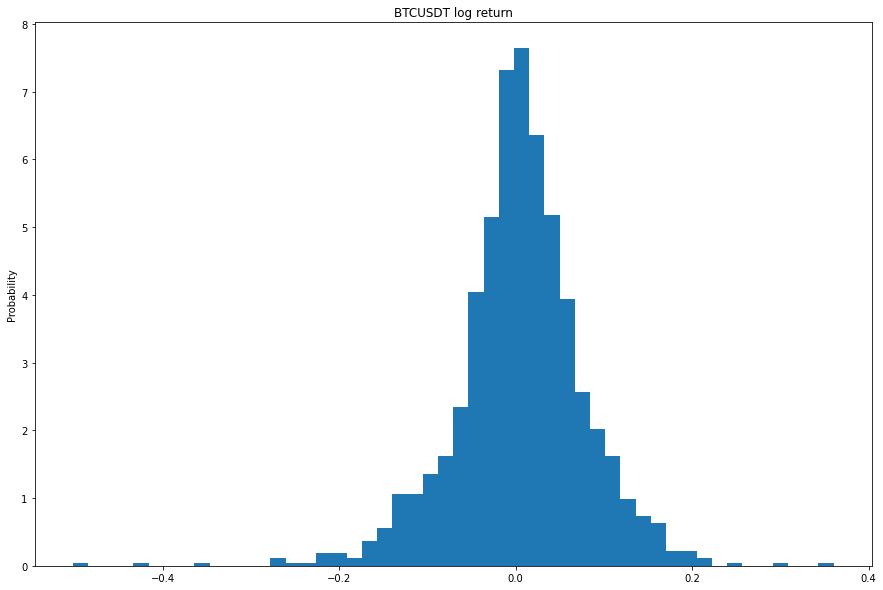

In [96]:
import numpy as np
import matplotlib.pyplot as plt


btc_df["log_return"] = btc_df["close"].map(np.log).diff(periods=3)
plt.figure(figsize=(15, 10))
plt.hist(btc_df["log_return"], bins=50, density=True)
plt.title("BTCUSDT log return")
plt.ylabel("Probability")
plt.show()

### Technical indicators

In [97]:
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volume import AccDistIndexIndicator
from ta.volatility import BollingerBands


def add_technical_indicators(df,
                   rsi_window=14, 
                   macd_window_slow=26, 
                   macd_window_fast=12, 
                   macd_window_sign=9, 
                   bollinger_window=20, 
                   bollinger_window_dev=2, 
                  ):
    # compares the magnitude of recent gains and losses 
    # over a specified time period to measure speed and 
    # change of price movements of a security
    df["rsi"] = RSIIndicator(df["close"], window=rsi_window).rsi()
    
    # trend-following momentum indicator that shows the 
    # relationship between two moving averages of prices
    macd = MACD(df["close"],
                 window_slow=macd_window_slow, 
                 window_fast=macd_window_fast, 
                 window_sign=macd_window_sign, 
                )
    df["macd_line"] = macd.macd()
    df["macd_diff"] = macd.macd_diff()
    df["macd_signal"] = macd.macd_signal()
    
    # A/D measure seeks to identify divergences between the 
    # stock price and the volume flow
    df["adi"] = AccDistIndexIndicator(df["high"], 
                                      df["low"], 
                                      df["close"], 
                                      df["volume"]
                                     ).acc_dist_index()
    
    # Bollinger Bands
    bolli = BollingerBands(df["close"], 
                           window=bollinger_window, 
                           window_dev=bollinger_window_dev, 
                          )
    df["crossing_hband"] = bolli.bollinger_hband_indicator()
    df["crossing_lband"] = bolli.bollinger_lband_indicator()
    df["pband"] = bolli.bollinger_pband()
    df["wband"] = bolli.bollinger_wband()
    
    return df

btc_df = add_technical_indicators(btc_df)
btc_df.tail(20)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,datetime,log_return,rsi,macd_line,macd_diff,macd_signal,adi,crossing_hband,crossing_lband,pband,wband
1561,1637798400000,57138.29,59398.90,57000.00,58960.36,42153.515220,1637884799999,2.455659e+09,1604266,21112.80397,1.230023e+09,0.0,2021-11-25 00:00:00,0.047109,46.941786,-908.123619,-654.070112,-254.053508,8.828452e+06,0.0,0.0,0.317922,22.708420
1562,1637884800000,58960.37,59150.00,53500.00,53726.53,65927.870660,1637971199999,3.649354e+09,2138184,31287.46990,1.731975e+09,0.0,2021-11-26 00:00:00,-0.068596,36.899360,-1280.487579,-821.147257,-459.340322,8.767811e+06,0.0,0.0,0.024038,25.403458
1563,1637971200000,53723.72,55280.00,53610.00,54721.03,29716.999570,1638057599999,1.623173e+09,1110145,14462.93801,7.901915e+08,0.0,2021-11-27 00:00:00,-0.043226,39.545878,-1478.299939,-815.167694,-663.132245,8.777634e+06,0.0,0.0,0.134874,26.930287
1564,1638057600000,54716.47,57445.05,53256.64,57274.88,36163.713700,1638143999999,1.982198e+09,1253408,18520.69985,1.016073e+09,0.0,2021-11-28 00:00:00,-0.029003,45.829100,-1412.708484,-599.660991,-813.047493,8.810859e+06,0.0,0.0,0.310687,25.465734
1565,1638144000000,57274.89,58865.97,56666.67,57776.25,40125.280090,1638230399999,2.313371e+09,1349625,19520.25038,1.125241e+09,0.0,2021-11-29 00:00:00,0.072671,46.993843,-1305.224598,-393.741684,-911.482914,8.811222e+06,0.0,0.0,0.362531,23.645635
1566,1638230400000,57776.25,59176.99,55875.55,56950.56,49161.051940,1638316799999,2.823644e+09,1587472,23867.80287,1.371720e+09,0.0,2021-11-30 00:00:00,0.039935,45.267626,-1272.006230,-288.418653,-983.587577,8.794076e+06,0.0,0.0,0.324140,22.720476
1567,1638316800000,56950.56,59053.55,56458.01,57184.07,44956.636560,1638403199999,2.584929e+09,1442301,21501.29463,1.236414e+09,0.0,2021-12-01 00:00:00,-0.001587,45.873163,-1212.857068,-183.415592,-1029.441476,8.774271e+06,0.0,0.0,0.360737,21.407572
1568,1638403200000,57184.07,57375.47,55777.77,56480.34,37574.059760,1638489599999,2.127110e+09,1307890,18375.47518,1.040367e+09,0.0,2021-12-02 00:00:00,-0.022685,44.283082,-1208.831404,-143.511943,-1065.319461,8.769743e+06,0.0,0.0,0.324460,20.223258
1569,1638489600000,56484.26,57600.00,51680.00,53601.05,58927.690270,1638575999999,3.246199e+09,1865063,27287.25751,1.505557e+09,0.0,2021-12-03 00:00:00,-0.060615,38.415831,-1421.588489,-285.015222,-1136.573267,8.749059e+06,0.0,0.0,0.109639,19.511785
1570,1638576000000,53601.05,53859.10,42000.30,49152.47,114203.373748,1638662399999,5.495712e+09,3362771,52876.55238,2.544633e+09,0.0,2021-12-04 00:00:00,-0.151348,31.476679,-1926.950553,-632.301829,-1294.648724,8.772611e+06,0.0,1.0,-0.191840,20.339915


### Feature heatmap

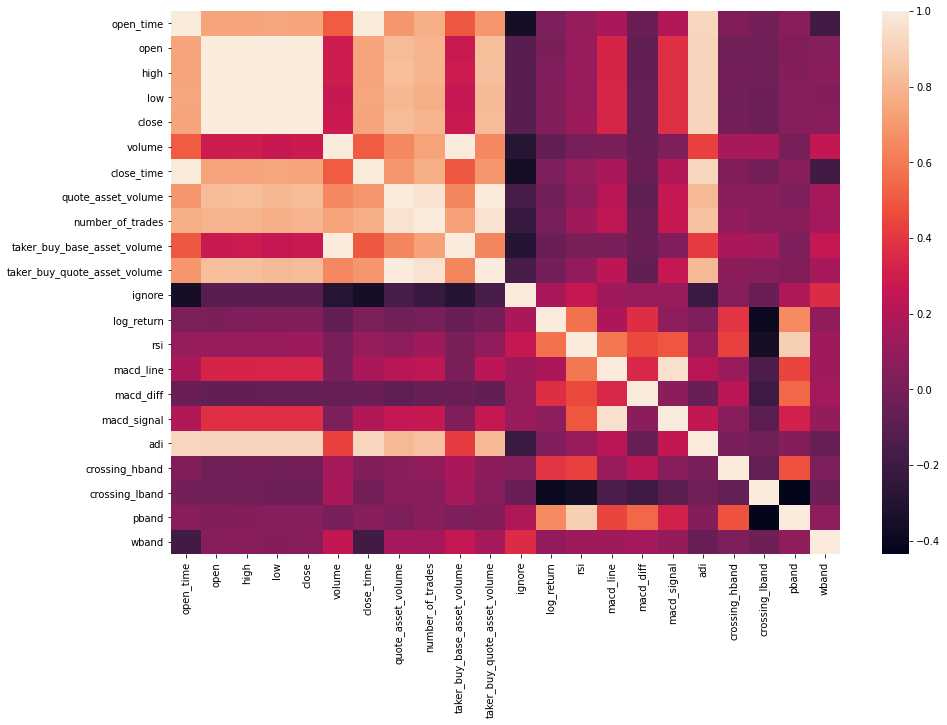

In [98]:
from seaborn import heatmap


feature_corr_matrix = btc_df.corr()
plt.figure(figsize=(15, 10))
ax = heatmap(feature_corr_matrix, cbar=True)
plt.show()

### Feature selection

In [122]:
threshold = 0.3
selected_features = [f for f in feature_corr_matrix.columns \
                     if feature_corr_matrix["log_return"].loc[f] >= threshold]
btc_df[selected_features].corr()

,log_return,rsi,macd_diff,crossing_hband,pband
log_return,1.000000,0.569904,0.368208,0.389330,0.647193
rsi,0.569904,1.000000,0.451249,0.422257,0.887786
macd_diff,0.368208,0.451249,1.000000,0.224849,0.540527
crossing_hband,0.389330,0.422257,0.224849,1.000000,0.478291
pband,0.647193,0.887786,0.540527,0.478291,1.000000


From the above correlation matrix, some technical indicators are strongly correlating to log return over coming 3 days, best ones are rsi, macd_diff, crossing_hband, pband. 

### Feature scaling

In [123]:
btc_df[selected_features].describe()

,log_return,rsi,macd_diff,crossing_hband,pband
count,1578.000000,1568.000000,1548.000000,1581.000000,1562.000000
mean,0.004655,53.168369,-6.633091,0.076534,0.548916
std,0.072742,14.170625,329.769005,0.265934,0.339346
min,-0.502021,10.497797,-1726.925154,0.000000,-0.480954
25%,-0.031649,43.517901,-88.222903,0.000000,0.282367
50%,0.005008,52.006315,6.663153,0.000000,0.563704
75%,0.045672,62.842698,93.149915,0.000000,0.824616
max,0.360149,93.460719,1303.727940,1.000000,1.527677


#### MACD illustration

![MACD illustration](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/MACDpicwiki.gif/350px-MACDpicwiki.gif)

In [124]:
# MACD histogram has a scale effect based on price
# normalize this feature before model fitting
btc_df["normalized_macd_diff"] = btc_df["macd_diff"] / btc_df["close"]

In [126]:
selected_features.remove("macd_diff")
selected_features.append("normalized_macd_diff")
btc_df[selected_features].describe()

,log_return,rsi,crossing_hband,pband,normalized_macd_diff
count,1578.000000,1568.000000,1581.000000,1562.000000,1548.000000
mean,0.004655,53.168369,0.076534,0.548916,0.000156
std,0.072742,14.170625,0.265934,0.339346,0.014850
min,-0.502021,10.497797,0.000000,-0.480954,-0.075990
25%,-0.031649,43.517901,0.000000,0.282367,-0.007225
50%,0.005008,52.006315,0.000000,0.563704,0.000959
75%,0.045672,62.842698,0.000000,0.824616,0.009275
max,0.360149,93.460719,1.000000,1.527677,0.042328


In [127]:
btc_df[selected_features].corr()

,log_return,rsi,crossing_hband,pband,normalized_macd_diff
log_return,1.000000,0.569904,0.389330,0.647193,0.497419
rsi,0.569904,1.000000,0.422257,0.887786,0.585062
crossing_hband,0.389330,0.422257,1.000000,0.478291,0.275681
pband,0.647193,0.887786,0.478291,1.000000,0.702435
normalized_macd_diff,0.497419,0.585062,0.275681,0.702435,1.000000


We successfuly improved correlation of macd by normalizing it with close price. 

In [144]:
# prepare the function that later on will be used to 
# generate a dataset reflecting the hyperparameters
def generate_params_df(source_df, params):
    df = source_df.copy()
    
    df["log_return"] = df["close"].map(np.log).diff(periods=3)
    df = add_technical_indicators(df, *params)
    df["normalized_macd_diff"] = df["macd_diff"] / df["close"]
    
    return df[selected_features].dropna(axis=0)

### Train/Test split

We split the data to train/test sets, where the train is used for base model fitting with a set of hyperparameter (explained below), test set prevent us from **overfitting**. 

In [105]:
def train_test_split(df, training_size=0.7):
    train_end = int(len(df) * training_size)
    
    train_df = df.iloc[:train_end, :]
    X_train = train_df[[x for x in train_df.columns if x != "log_return"]]
    Y_train = train_df["log_return"]

    test_df = df.iloc[train_end:, :]
    X_test = test_df[[x for x in test_df.columns if x != "log_return"]]
    Y_test = test_df["log_return"]
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = train_test_split(btc_df)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1106, 23)
(1106,)
(475, 23)
(475,)


### Hyperparameters from technical indicators

In [107]:
rsi_windows = (9, 14, 19)
macd_windows_slow = (21, 26, 31) 
macd_windows_fast = (7, 12, 17) 
macd_windows_sign = (4, 9, 14) 
bollinger_windows = (15, 20, 25) 
bollinger_windows_dev = (2, 4, 6)


from itertools import product


all_hyperparams = list(product(rsi_windows, 
                    macd_windows_slow, 
                    macd_windows_fast, 
                    macd_windows_sign, 
                    bollinger_windows, 
                    bollinger_windows_dev, 
                    ))
print(f"{len(all_hyperparams)} sets of hyperparameters. ")

729 sets of hyperparameters. 


### Optimization metric definition

In [108]:
def mean_squared_error(y_truth, y_predicted):
    return np.mean((y_truth - y_predicted) ** 2)

### Model selection

In [188]:
# SVM.SVR, Decision tree, Gradient boosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


cols = ["model", "hyperparams", "train_loss", "test_loss"]
models = [DecisionTreeRegressor, GradientBoostingRegressor, SVR]
result_df = pd.DataFrame(columns=cols)

i = 0
trials = len(all_hyperparams) * len(models)
for hyperparams in all_hyperparams:
    # generate dataset reflecting the hyperparams
    params_df = generate_params_df(source_df, hyperparams)
    X_train, Y_train, X_test, Y_test = train_test_split(params_df)
    
    for model in models:
        if model is SVR:
            regressor = SVR(C=0.1)
            
        elif model is DecisionTreeRegressor:
            regressor = DecisionTreeRegressor(random_state=0, \
                                              criterion="squared_error", max_depth=4)

        elif model is GradientBoostingRegressor:
            regressor = GradientBoostingRegressor(random_state=0, \
                                              criterion="squared_error", n_estimators=30)
            
        regressor = regressor.fit(X_train, Y_train)
        
        train_prediction = regressor.predict(X_train)
        test_prediction = regressor.predict(X_test)

        train_loss = mean_squared_error(Y_train, train_prediction)
        test_loss = mean_squared_error(Y_test, test_prediction)
            
        result_df.loc[len(result_df)] = \
                    [model.__name__, hyperparams, train_loss, test_loss]
        
        i += 1
        print(f"{(i / trials * 100):.1f}% completed. ", end="\r")
    
result_df.sort_values(by=["test_loss"], axis=0)

,model,hyperparams,train_loss,test_loss
1462,GradientBoostingRegressor,"(19, 21, 7, 4, 15, 4)",0.001477,0.001451
1465,GradientBoostingRegressor,"(19, 21, 7, 4, 15, 6)",0.001477,0.001451
1459,GradientBoostingRegressor,"(19, 21, 7, 4, 15, 2)",0.001477,0.001451
1,GradientBoostingRegressor,"(9, 21, 7, 4, 15, 2)",0.001453,0.001461
4,GradientBoostingRegressor,"(9, 21, 7, 4, 15, 4)",0.001453,0.001461
...,...,...,...,...
1553,SVR,"(19, 21, 12, 4, 20, 4)",0.004205,0.003236
1634,SVR,"(19, 21, 17, 4, 20, 4)",0.004205,0.003236
1466,SVR,"(19, 21, 7, 4, 15, 6)",0.004208,0.003238
1547,SVR,"(19, 21, 12, 4, 15, 6)",0.004208,0.003239


*Note* that max_depth for Decision Tree Regressor = 4 is to prevent it memorizing the whole training data. 

### Best model prediction visualization

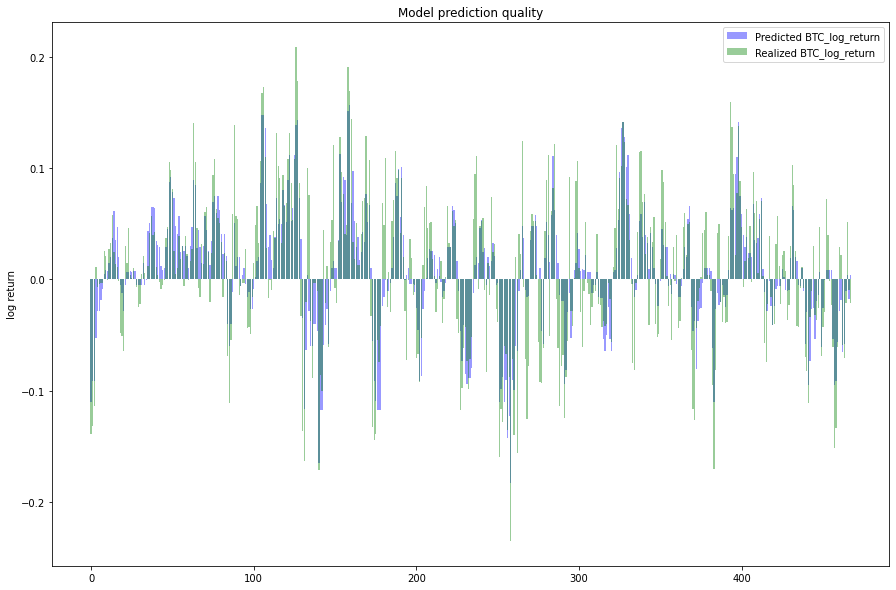

In [192]:
hyperparams = (19, 21, 7, 4, 15, 4)
params_df = generate_params_df(source_df, hyperparams)
X_train, Y_train, X_test, Y_test = train_test_split(params_df)

regressor = GradientBoostingRegressor(random_state=0, \
                                      criterion="squared_error", n_estimators=30)            
regressor = regressor.fit(X_train, Y_train)
test_prediction = regressor.predict(X_test)

plt.figure(figsize=(15, 10))
plt.bar(range(len(test_prediction)), test_prediction, label="Predicted BTC_log_return", color="blue", alpha=0.4)
plt.bar(range(len(Y_test)), Y_test, label="Realized BTC_log_return", color="green", alpha=0.4)
plt.title("Model prediction quality")
plt.ylabel("log return")
plt.legend()
plt.show()

In [243]:
# out-sample starting date
source_df.loc[X_train.index[-1] + 1]

open_time                             1599091200000
open                                       11388.54
high                                        11462.6
low                                          9960.8
close                                      10140.85
volume                                121950.106015
close_time                            1599177599999
quote_asset_volume                1325106403.315867
number_of_trades                            1611610
taker_buy_base_asset_volume             54266.83286
taker_buy_quote_asset_volume       590230451.112308
ignore                                          0.0
datetime                        2020-09-03 00:00:00
Name: 1113, dtype: object

### Save model for backtesting

In [203]:
import pickle


# save the model
with open('scti.pkl', 'wb') as fid:
    pickle.dump(regressor, fid)    

# load it again
with open('scti.pkl', 'rb') as fid:
    regressor_reloaded = pickle.load(fid)

In [208]:
# check model reimported
all(regressor_reloaded.predict(X_test) == test_prediction)

True

### Position sizing & Kelly criterion

In its simplest form, the fraction f to be invested in a trade = p / a - q / b, where <br>

p is probability of investment up, q = 1 - p, <br>
a is fraction lost if prediction is wrong, <br>
b is fraction won if prediction is right. 

In [212]:
# using test set to determine p, a, q, b
paqb = pd.DataFrame({"y_tru": Y_test.values, "y_predicted": test_prediction})
paqb

,y_tru,y_predicted
0,-0.138692,-0.110581
1,-0.132140,-0.091187
2,-0.113491,-0.091187
3,0.011311,-0.052438
4,-0.006994,-0.028133
5,-0.003946,-0.028133
6,-0.003614,-0.018644
7,-0.003532,-0.008479
8,0.025470,0.005149
9,0.021464,0.008673


In [255]:
p = 0
q = 0
b = [] # win, +ve
a = [] # lost, -ve

n = len(paqb)
for i in range(n):
    if paqb.loc[i, "y_tru"] >= 0:
        if paqb.loc[i, "y_predicted"] >= 0:
            p += 1 / n
            b.append(paqb.loc[i, "y_tru"])
        else:
            q += 1 / n
            a.append(-paqb.loc[i, "y_tru"])
    else:
        if paqb.loc[i, "y_predicted"] < 0:
            p += 1 / n
            b.append(-paqb.loc[i, "y_tru"])
        else:
            q += 1 / n
            a.append(paqb.loc[i, "y_tru"])

print(f"Win chance: {p:.3f}. ")
print(f"Losing chance: {q:.3f}. ")
print(f"Average win: {np.mean(b):.3f}. ")
print(f"Max lost: {min(a):.3f}. ")

kelly_f = p / abs(min(a)) - q / np.mean(b)
print(f"Kelly_fraction: {kelly_f:.3f}")

Win chance: 0.803. 
Losing chance: 0.197. 
Average win: 0.060. 
Max lost: -0.109. 
Kelly_fraction: 4.079


Convention is to apply quarter Kelly Criterion for conservatism. Hence, the fraction for each trade is around 1, to avoid margin order, it can be lowered to 0.5. 